## Dispersion Engineering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import colorcet as cc

#This are my libraries
import nlo 
import materials
import waveguides

#Larger font for plots
plt.rcParams.update({'font.size': 18})

## Units
We'll work in SI base units for the most part. Here we load some constants and also create some variables for scaling units conveniently.

In [2]:
from scipy.constants import pi, c, epsilon_0
nm = 1e-9
um = 1e-6
mm = 1e-3
ps = 1e-12
fs = 1e-15
GHz = 1e9
THz = 1e12
pJ = 1e-12
mW = 1e-3

## Example run

In [ ]:
hLN = 700*nm
width = 800*nm
etch = 200*nm
wavelength = 780*nm

## Sweep

8.000000000000001e-07
7.000000000000001e-07
9.000000000000001e-07
7.000000000000001e-07
1.0000000000000002e-06
7.000000000000001e-07
1.1e-06
7.000000000000001e-07
1.2000000000000002e-06
7.000000000000001e-07
1.3e-06
7.000000000000001e-07
1.4000000000000001e-06
7.000000000000001e-07
1.5e-06
7.000000000000001e-07


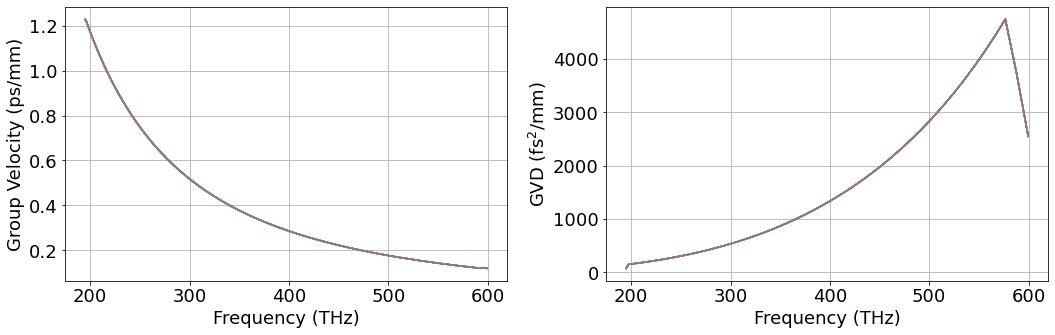

In [28]:
hLN = 700*nm
width = np.arange(800, 1501, 100)*nm
etch = np.arange(200, 201, 50)*nm

wavelength = np.arange(500,1550,10)*nm
f = c/wavelength
df = f[1]-f[0]

plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_ylabel('Group Velocity (ps/mm)'); ax1.set_xlabel('Frequency (THz)');
ax2.set_ylabel('GVD (fs$^2$/mm)'); ax2.set_xlabel('Frequency (THz)');

for ke in range(etch.size):
    for kw in range(width.size):
        wg = waveguides.waveguide(w_top=width[kw], h_ridge=hLN, h_slab=hLN-etch[ke])
        print(wg.w_top)
        print(wg.h_ridge)

        neff = np.zeros(wavelength.shape)
        for kw in range(wavelength.size):
            neff[kw] = wg.neff(wavelength[kw])
            
        beta = 2*pi*f*neff/c
        beta_1 = np.gradient(beta, 2*pi*df)
        beta_2 = np.gradient(beta_1, 2*pi*df)
        vg = 1/beta_1
        
        ax1.plot(f/THz, vg/(mm/ps));
        ax2.plot(f/THz, beta_2/(fs**2/mm));
        
        ax1.grid(True); ax2.grid(True);
        fig.tight_layout()